In [75]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [76]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/NoiseTests/Thor-no-fan/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/NoiseTests/Thor-no-fan/CV-3.3.0.0__0.csv


1
Fitted parameters saved to the interpolation attribute are:
        Amplitude:0.35018856323358794
        Period:1400.1084400937643
        Phase: 0.000197280999592651 
        Offset: 0.7911308997903532
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


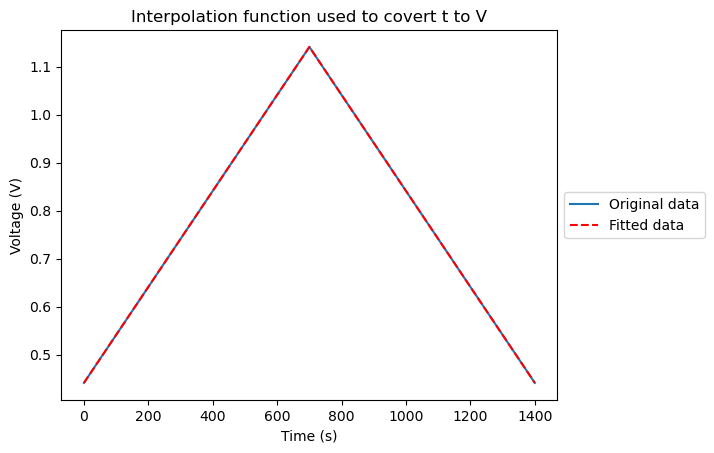

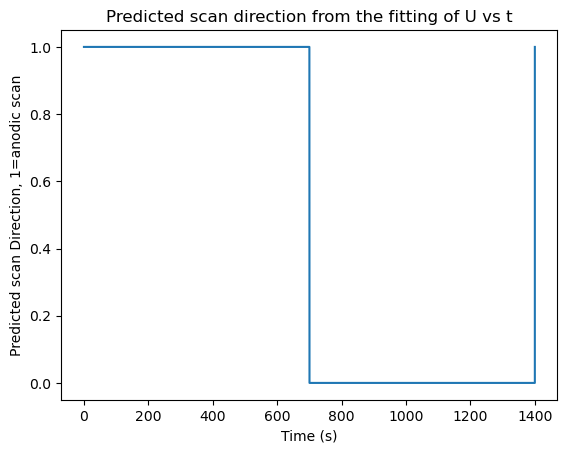

In [77]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

In [78]:
test=SpEC1.CV
test

,t_s,Ewe_V,I_A,Cycle
0,0.100000,0.441028,0.000035,0
1,0.200000,0.441101,0.000042,0
2,0.300000,0.441196,0.000044,0
3,0.400000,0.441297,0.000044,0
4,0.500000,0.441391,0.000044,0
...,...,...,...,...
13997,1399.800049,0.441291,0.000044,0
13998,1399.900024,0.441187,0.000044,0
13999,1400.000000,0.441099,0.000044,0
14000,1400.099976,0.440991,0.000044,0


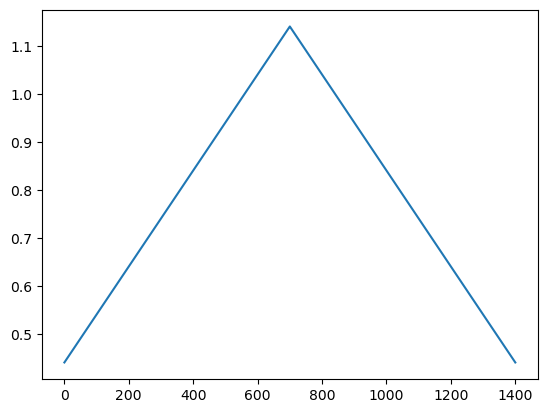

In [79]:
# plot the second and third collumns of test using iloc
plt.plot(test.iloc[:,0], test.iloc[:,1])

(7001, 2)


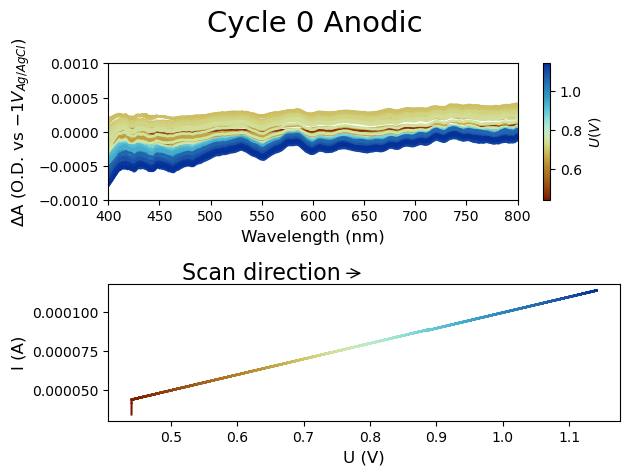

(7000, 2)


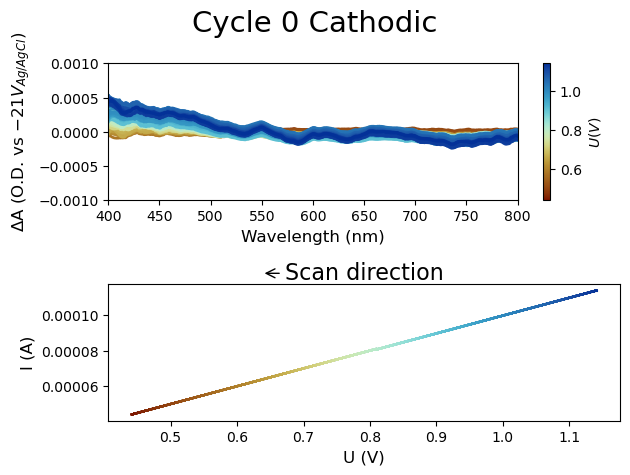

In [80]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -1, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.001, y_min=-0.001,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -21, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.001, y_min=-0.001,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -1V_{Ag/AgCl}$)'>)

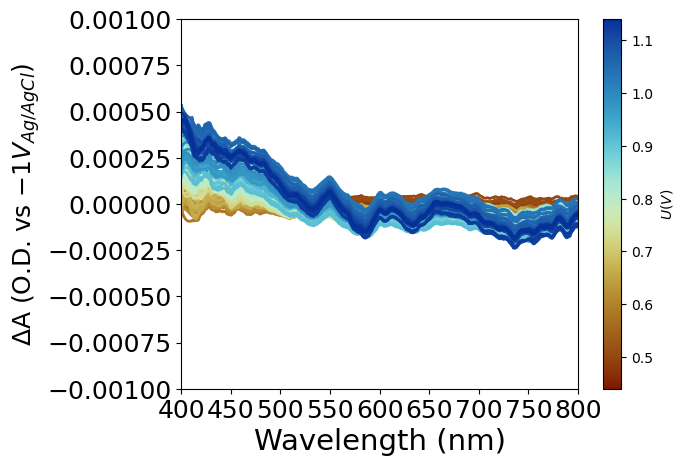

In [91]:
data, ref=sp.calculateDOD(SpEC1, 0, 'Cathodic', -1, 21)
sp.plot_DOD(data, y_max=0.001, y_min=-0.001, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

In [82]:
data=sp.calculateDOD(SpEC1, 0, 'Anodic', -0.2, 21)[0]
data

Voltage (V),0.440,0.445,0.450,0.455,0.460,0.465,0.470,0.475,0.480,0.485,...,1.095,1.100,1.105,1.110,1.115,1.120,1.125,1.130,1.135,1.140
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
400,0.0,-0.000015,-0.000033,-0.000037,-0.000007,0.000006,-0.000013,-0.000035,-0.000044,-0.000123,...,-0.000720,-0.000731,-0.000771,-0.000745,-0.000777,-0.000750,-0.000764,-0.000766,-0.000782,-0.000789
401,0.0,-0.000009,0.000001,0.000009,0.000012,0.000012,0.000007,-0.000003,-0.000028,-0.000103,...,-0.000715,-0.000719,-0.000759,-0.000739,-0.000750,-0.000718,-0.000730,-0.000727,-0.000762,-0.000766
402,0.0,-0.000005,0.000028,0.000045,0.000028,0.000018,0.000021,0.000022,-0.000016,-0.000087,...,-0.000704,-0.000702,-0.000743,-0.000727,-0.000723,-0.000687,-0.000698,-0.000691,-0.000741,-0.000742
403,0.0,-0.000003,0.000048,0.000073,0.000041,0.000023,0.000031,0.000041,-0.000008,-0.000073,...,-0.000687,-0.000681,-0.000723,-0.000710,-0.000698,-0.000658,-0.000666,-0.000657,-0.000719,-0.000717
404,0.0,-0.000002,0.000062,0.000094,0.000052,0.000027,0.000038,0.000054,-0.000003,-0.000062,...,-0.000667,-0.000656,-0.000700,-0.000689,-0.000673,-0.000630,-0.000637,-0.000626,-0.000697,-0.000692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.000033,0.000088,0.000105,0.000095,0.000095,0.000129,0.000143,0.000126,0.000099,...,0.000388,0.000393,0.000386,0.000353,0.000357,0.000418,0.000400,0.000383,0.000367,0.000411
939,0.0,0.000038,0.000096,0.000098,0.000090,0.000087,0.000124,0.000147,0.000117,0.000086,...,0.000402,0.000399,0.000402,0.000366,0.000376,0.000439,0.000410,0.000389,0.000381,0.000434
940,0.0,0.000044,0.000106,0.000087,0.000083,0.000077,0.000117,0.000153,0.000105,0.000069,...,0.000416,0.000401,0.000418,0.000382,0.000397,0.000464,0.000420,0.000392,0.000398,0.000460


(-0.0002, 0.002)

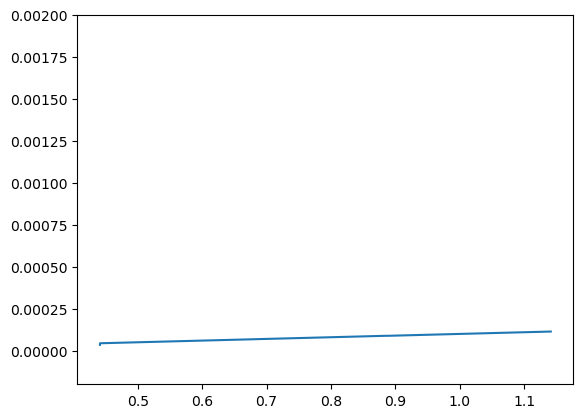

In [83]:
test=SpEC1.CV_scans[0]['Anodic']

# plot the fist and second collumns of test

plt.plot(test.iloc[:,1], test.iloc[:,2])
# set the y range from -0.0001 to 0.002
plt.ylim(-0.0002, 0.002)
#

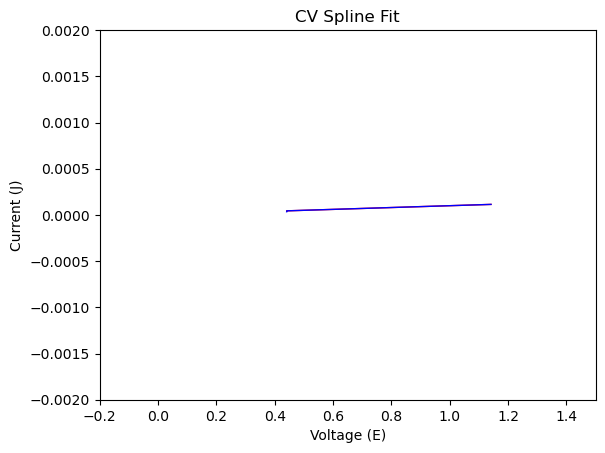

array(-3.34145451e-06)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





In [85]:
sorted_indices

0          0
1          1
2          2
3          3
4          4
        ... 
6996    6996
6997    6997
6998    6998
6999    6999
7000    7000
Name: Ewe_V, Length: 7001, dtype: int64

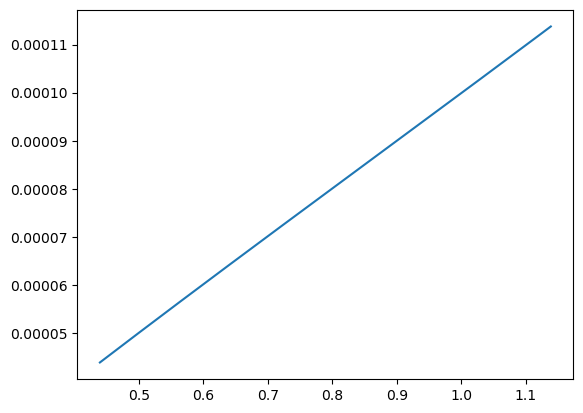

In [86]:
Spectral_voltages=data.columns.values
Spectral_currents=spl(Spectral_voltages)

Cell_resistance=10 # ohms

iR=Cell_resistance*Spectral_currents

Spectral_voltages_corrected=Spectral_voltages-iR

plt.plot(Spectral_voltages_corrected, Spectral_currents)



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -1V_{Ag/AgCl}$)'>)

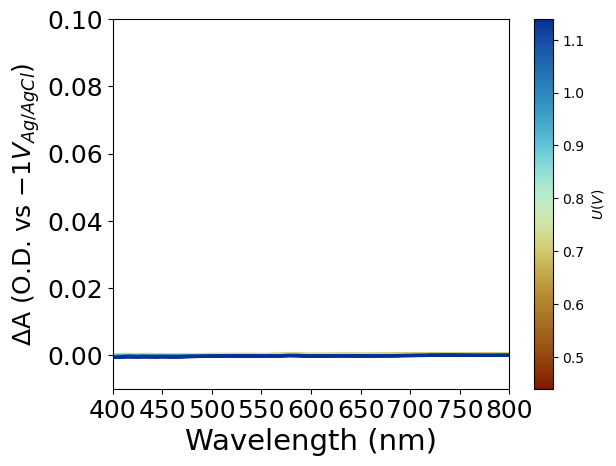

In [87]:
# use Spectral_voltages_corrected as the collumn names for the data

data_iR=data.copy(deep=True) 

data_iR.columns=Spectral_voltages_corrected

data_iR

# use plot_DOD to plot the data_iR

sp.plot_DOD(data_iR, y_max=0.1, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -1V_{Ag/AgCl}$)'>)

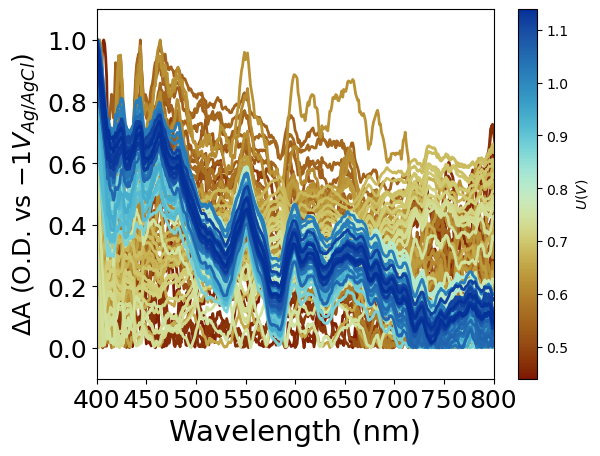

In [88]:

# normalise the data_iR

data_iR_norm=sp.normalise_DOD(data_iR.abs())

# plot the normalised data_iR📈

sp.plot_DOD(data_iR_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")



/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_18673/3047782232.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

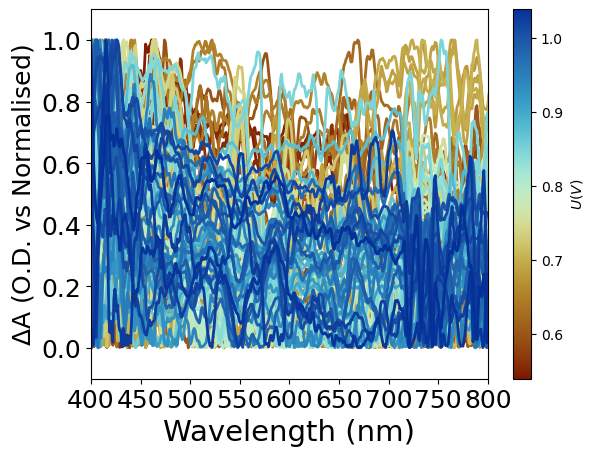

In [89]:
# loop though data_iR_norm and from collumn 20 to collumn n-20 
# subtract collumn 20 from collumn i-20, put this into a new dataframe called data_iR_norm_diff

step=20
data_iR_diff=pd.DataFrame()
for i in range(step, len(data_iR_norm.columns)-step):
    data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
    # apply a savinky golay filter to the data_iR_norm_diff using the function savgol_filter from scipy.signal
    data_iR_diff[data_iR_norm.columns[i]]=signal.savgol_filter(data_iR_diff[data_iR_norm.columns[i]], 5, 3)

    
# normalise the data_iR_diff

data_iR_diff_norm=sp.normalise_DOD(data_iR_diff.abs())


sp.plot_DOD(data_iR_diff_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")




In [90]:
print(data_iR_diff_norm.columns.values[0], data_iR_diff_norm.columns.values[50], data_iR_diff_norm_U.columns.values[90])

NameError: name 'data_iR_diff_norm_U' is not defined

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

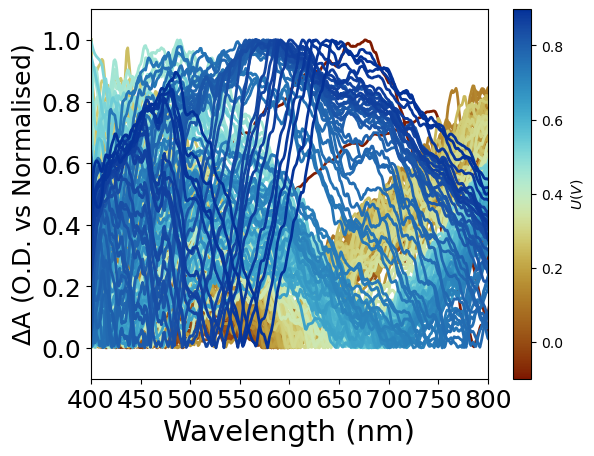

In [ ]:
Ustart=data_iR_diff_norm.columns.values[0]
Uend=data_iR_diff_norm.columns.values[200]


# get the data between Ustart and Uend

data_iR_diff_norm_U=data_iR_diff_norm.loc[:, Ustart:Uend]

# plot the data_iR_diff_norm_U

sp.plot_DOD(data_iR_diff_norm_U, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")